In [0]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# Load data from https://www.openml.org/d/554
%time X, y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

CPU times: user 17.3 s, sys: 648 ms, total: 17.9 s
Wall time: 24.8 s


正解データ: ['5' '0' '4' ... '4' '5' '6']
画像の次元: (70000, 784)
最初のデータ: 
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 

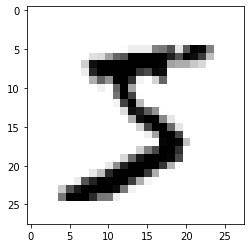

In [0]:
print(f'正解データ: {y}')
print(f'画像の次元: {X.shape}')
print(f'最初のデータ: \n{X[0]}')

# 画像データは 784 個のピクセルが一列に並んでいるので、
# 表示するには X[0].reshape(28,28) のように reshape で 28 x 28 の二次元配列に変換します。
print(f'最初のデータ画像')
plt.imshow(X[0].reshape(28,28), cmap=plt.cm.gray_r)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X / 255, # ピクセル値が 0 - 1 になるようにする
                                                        y.astype('int64'), # 正解データを数値にする
                                                        stratify = y,
                                                        random_state=0)
print(f'X_train の長さ: {len(X_train)}')
print(f'X_test の長さ: {len(X_test)}')
print(f'X_train の内容: {X_train}')
print(f'X_test の内容: {X_test}')
print(f'y_train の内容: {y_train}')
print(f'y_test の内容: {y_test}')

X_train の長さ: 52500
X_test の長さ: 17500
X_train の内容: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
X_test の内容: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_train の内容: [2 1 2 ... 6 5 5]
y_test の内容: [7 2 7 ... 3 7 6]


scikit-learn でロジスティック回帰

In [0]:
def sklearn_logistic():
    clf = LogisticRegression(solver='lbfgs', multi_class='auto')
    clf.fit(X_train, y_train) # 学習
    print('accuracy_score: %.3f' % clf.score(X_test, y_test)) # 検証
%time sklearn_logistic()

accuracy_score: 0.925
CPU times: user 43.1 s, sys: 4.89 s, total: 48 s
Wall time: 24.3 s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

scikit-learn で Support Vector Machines (SVC)

In [0]:
def sklearn_svc():
    clf = SVC(kernel='rbf', gamma='auto', random_state=0, C=2)
    clf.fit(X_train, y_train)
    print('accuracy_score: %.3f' % clf.score(X_test, y_test))
%time sklearn_svc()

scikit-learn でニュラルネットワーク

In [0]:
def sklearn_mlp():
    clf = MLPClassifier(hidden_layer_sizes=(128,), solver='adam', max_iter=15, verbose=10, random_state=0)
    clf.fit(X_train, y_train)
    print('accuracy_score: %.3f' % clf.score(X_test, y_test))
%time sklearn_mlp()

Iteration 1, loss = 0.42688226
Iteration 2, loss = 0.20116195
Iteration 3, loss = 0.15006803
Iteration 4, loss = 0.11915271
Iteration 5, loss = 0.09875778
Iteration 6, loss = 0.08330753
Iteration 7, loss = 0.07107738
Iteration 8, loss = 0.06181587
Iteration 9, loss = 0.05333600
Iteration 10, loss = 0.04795776
Iteration 11, loss = 0.04195001
Iteration 12, loss = 0.03634990
Iteration 13, loss = 0.03223744
Iteration 14, loss = 0.02872861
Iteration 15, loss = 0.02420542
accuracy_score: 0.976
CPU times: user 36.7 s, sys: 12.2 s, total: 49 s
Wall time: 24.9 s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ニューラルネットワークの前処理としてスケール変換をする

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes=(128,), solver='adam', max_iter=15, verbose=10, random_state=0)
clf.fit(X_train_scaled, y_train)

print("Scaled test set accuracy:{:.2f}".format(
    clf.score(X_test_scaled, y_test)))

Iteration 1, loss = 0.42691675
Iteration 2, loss = 0.20120201
Iteration 3, loss = 0.14999649
Iteration 4, loss = 0.11917003
Iteration 5, loss = 0.09871456
Iteration 6, loss = 0.08326198
Iteration 7, loss = 0.07108888
Iteration 8, loss = 0.06184526
Iteration 9, loss = 0.05327691
Iteration 10, loss = 0.04782577
Iteration 11, loss = 0.04190793
Iteration 12, loss = 0.03615788
Iteration 13, loss = 0.03219960
Iteration 14, loss = 0.02865238
Iteration 15, loss = 0.02422943
Scaled test set accuracy:0.98


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
